# Osztályozás
Az osztályozás egy gépi tanulási feladat, amelynek célja, hogy egy adott bemeneti adatot előre meghatározott kategóriák valamelyikébe soroljon. Az osztályozási modellek a tanító adatok alapján tanulják meg az osztályok közötti különbségeket, majd ezeket az ismereteket alkalmazzák új adatok osztályozására.

Annak az előrejelzése például, hogy egy banki ügyfél felveheti-e vagy sem a kért hitelt, egy osztályozási feladat mivel a célváltozó diszkrét (ebben az esetben ráadásul bináris is): pozitív elbírálás vagy elutasítás.

## Iris adatok osztályozása - példa

Tekintsük azt a klasszikus feladatot, amelyben virágok fajtáját (*Setosa, Versicolor, Virginica*) szeretnénk előrejelezni [tulajdonságaik alapján](https://en.wikipedia.org/wiki/Iris_flower_data_set) (virágszirom, csészelevél méretek alapján).
Az adathalmaz három íriszfaj (Iris setosa, Iris virginica és Iris versicolor) 50 mintájából áll. Minden minta négy jellemzőt tartalmaz - a csészelevelek és szirmok hosszát és szélességét centiméterben:

![](iris_adatok.png) 

### Iris adatok osztályozása

In [ ]:
!python -m pip install seaborn scikit-learn --user --upgrade

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length','sepal-width','petal-length','petal-width','class']
dataset = pd.read_csv(url, names=names)

In [3]:
print("Adathalmaz mérete:")
print(dataset.shape)

Adathalmaz mérete:
(150, 5)


In [4]:
print("\nAdathalmaz első pár sora:")
print(dataset.head(10))


Adathalmaz első pár sora:
   sepal-length  sepal-width  petal-length  petal-width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
5           5.4          3.9           1.7          0.4  Iris-setosa
6           4.6          3.4           1.4          0.3  Iris-setosa
7           5.0          3.4           1.5          0.2  Iris-setosa
8           4.4          2.9           1.4          0.2  Iris-setosa
9           4.9          3.1           1.5          0.1  Iris-setosa


In [5]:
print("\nAdathalmaz statisztikai összefoglalója:")
print(dataset.describe())


Adathalmaz statisztikai összefoglalója:
       sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [6]:
print("\nOsztályok eloszlása:")
print(dataset.groupby('class').size())


Osztályok eloszlása:
class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


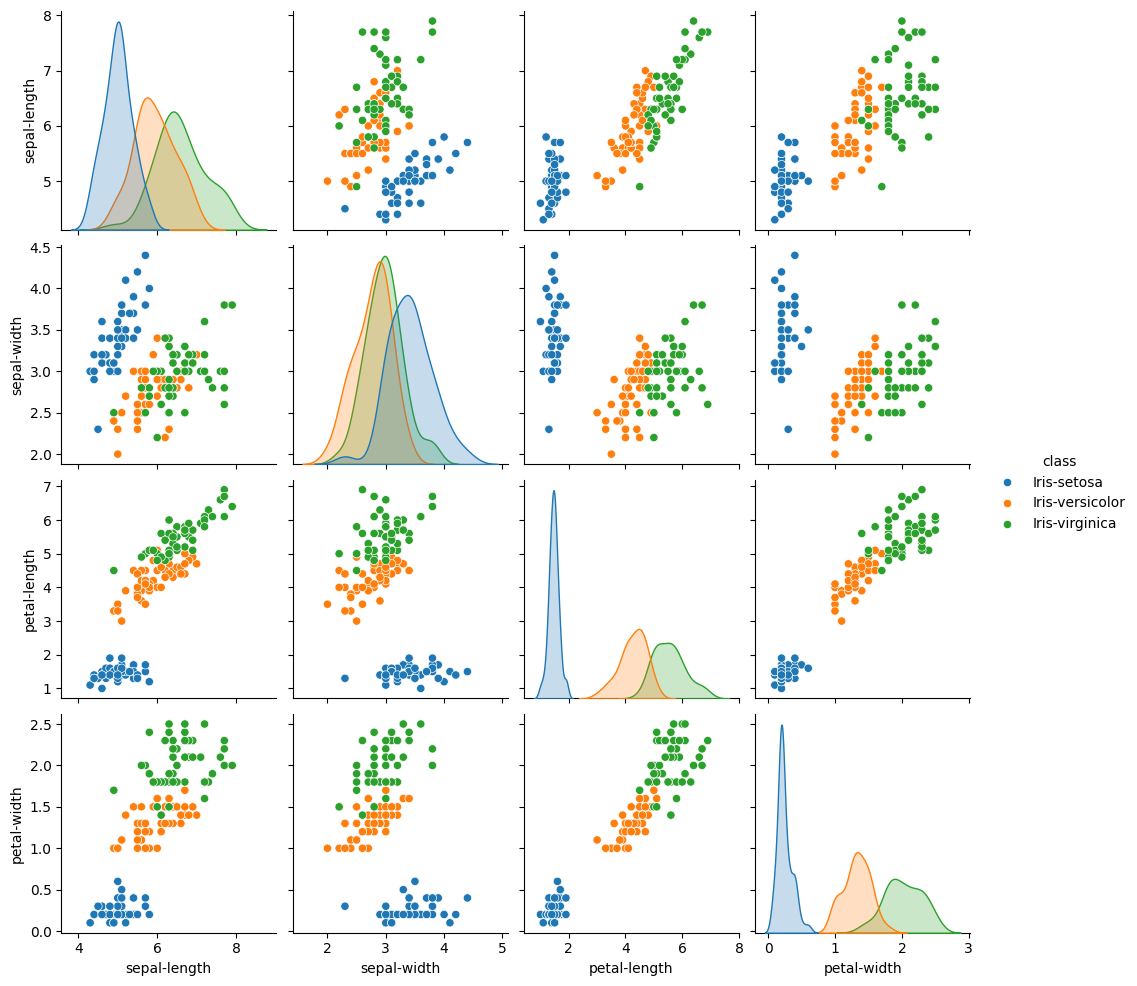

In [7]:
# Adathalmaz vizualizálása
sns.pairplot(dataset, hue='class')
plt.show()

### Boxplotok

A **boxplot** (dobozdiagram) egy vizualizációs eszköz, amely az adatok eloszlását és néhány alapvető statisztikai jellemzőjét jeleníti meg. A boxplot segítségével könnyen azonosíthatók az adatok közötti eltérések, a szórás, valamint a kiugró értékek.

#### Hogyan épül fel egy boxplot?
- **Doboz (*box*)**: Az alsó és felső határa az első (Q1) és harmadik kvartilis (Q3), a doboz belsejében található a medián (Q2).
- **Bajuszok (*whiskers*)**: Az adatok azon tartományát mutatják, amelyek nem számítanak kiugrónak (általában Q1 - 1.5 * IQR és Q3 + 1.5 * IQR között).
- **Kiugró értékek (*outliers*)**: Azok az adatok, amelyek a bajuszokon kívül esnek, külön pontokként jelennek meg.

#### Példa
Az alábbi boxplot például az Iris adathalmaz különböző jellemzőinek eloszlását mutatja be:

```python
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()
```

Ez a kód minden jellemzőre külön boxplotot készít, így könnyen összehasonlíthatók az egyes változók eloszlásai.

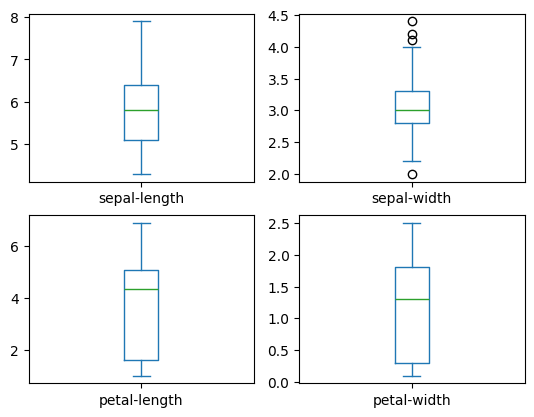

In [8]:
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()


### Hisztogramok

A hisztogramok az adatok eloszlásának vizualizálására szolgálnak. Segítenek az adatok eltolódásának vizsgálatában. Az alábbi kód segítségével az Iris adathalmaz minden numerikus jellemzőjére külön hisztogramot készítünk:

```python
dataset.hist()
plt.show()
```

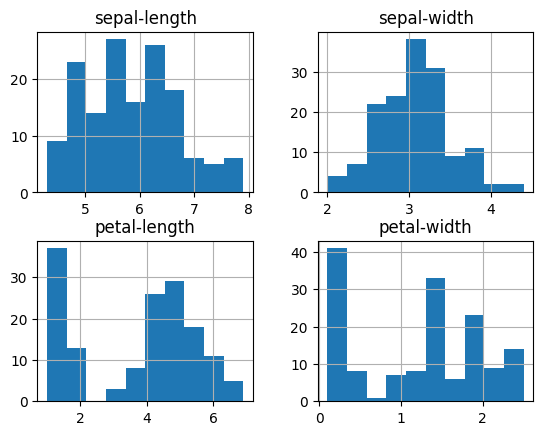

In [9]:
dataset.hist()
plt.show()

## Jöhet a tanítás!

Miután az adatokat megismertük és előkészítettük, a következő lépés a gépi tanulási modell tanítása. A tanítás során a modellt az adatok alapján optimalizáljuk, hogy képes legyen új, ismeretlen adatokra is helyesen reagálni.

A következő cellában az Iris adathalmazból egy új tömb jön létre, amelyben az első négy oszlop (numerikus jellemzők) az `X` változóba kerül, míg az ötödik oszlop (osztálycímkék) a `Y` változóba. Ezután az adathalmazt véletlenszerűen két részre osztjuk: egy tanító halmazra (`X_train`, `Y_train`) és egy validációs halmazra (`X_validation`, `Y_validation`). A validációs halmaz az adatok 20%-át tartalmazza, míg a tanító halmaz a maradék 80%-ot. Az osztás véletlenszerűségét a `seed` változó értéke határozza meg, hogy az eredmények reprodukálhatók legyenek.

Ezt a folyamatot a `train_test_split` függvény végzi el, amely a `sklearn.model_selection` könyvtár része. A `train_test_split` függvény bemeneti paraméterei közé tartozik az adathalmaz (`X`), a címkék (`Y`), a tesztméret (`test_size`) és a véletlenszám-generátor (`random_state`). A `test_size` paraméter 0.2-ra van állítva, ami azt jelenti, hogy az adatok 20%-át használjuk validációra, míg a maradék 80%-ot tanításra.

Ezt azért fontos megtenni, mert a gépi tanulási modellek teljesítményének értékeléséhez szükség van egy külön halmazra, amelyet a modell nem látott a tanítás során. Ez segít elkerülni a túltanulást (*overfitting*), amikor a modell túl jól illeszkedik a tanító adatokhoz, de gyengén teljesít az új, ismeretlen adatokon.

In [10]:
array = dataset.values
X = array[:,0:4]
Y = array[:,4]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

A következő kódokban különböző klasszifikáló algoritmusokat fogunk alkalmazni az adathalmazon: 

1. Logistic Regression
2. Decision Tree
3. K-Nearest Neighbors (KNN)
4. Linear Discriminant Analysis (LDA)
5. Gaussian Naive Bayes
6. Support Vector Machine (SVM)

Ezek mind népszerű klasszifikáló algoritmusok, amelyeket széles körben használnak a gépi tanulásban. Az alábbi kódokban mindegyik algoritmust külön-külön alkalmazzuk az adathalmazon, és kiértékeljük a teljesítményüket a pontosság (*accuracy*) és a klasszifikációs jelentés (*classification report*) segítségével. A pontosság megmutatja, hogy az algoritmus mennyire pontosan osztályozta az adatokat, míg a klasszifikációs jelentés részletesebb információkat ad a különböző osztályok teljesítményéről, beleértve a precizitást (*precision*), a visszahívást (*recall*) és a F1-score-t is.

### Mi az a pontosság (*accuracy*)?
A pontosság (*accuracy*) egy olyan mérőszám, amely megmutatja, hogy a klasszifikáló algoritmus hány esetben osztályozta helyesen az adatokat. A pontosság kiszámítása a következőképpen történik: $accuracy = \frac{TP + TN}{TP + TN + FP + FN}$, ahol:
- TP (*True Positive)*: Helyesen pozitív osztályozások száma
- TN (*True Negative)*: Helyesen negatív osztályozások száma
- FP (*False Positive*): Helytelenül pozitív osztályozások száma
- FN (*False Negative*): Helytelenül negatív osztályozások száma
A pontosság értéke 0 és 1 között mozog, ahol 1 azt jelenti, hogy az összes osztályozás helyes volt.

### Mi az a klasszifikációs jelentés (*classification report*)?

A klasszifikációs jelentés (*classification report*) egy részletes összefoglaló a klasszifikáló algoritmus teljesítményéről. Tartalmazza a következőket:
- **Precizitás (*Precision*)**: Megmutatja, hogy a klasszifikáló hány esetben osztályozta helyesen a pozitív osztályt a pozitív osztályozások közül.
A következő képlet segítségével számítható ki: $precision = \frac{TP}{TP + FP}$

- **Visszahívás (*Recall*)**: Megmutatja, hogy a klasszifikáló hány esetben osztályozta helyesen a pozitív osztályt a tényleges pozitív esetek közül. A következő képlet segítségével számítható ki: $recall = \frac{TP}{TP + FN}$

- **F1-score**: A precizitás és a visszahívás harmonikus átlaga, amely egyensúlyt teremt a két mérőszám között.



Modell végső kiértékelése a teszt adatokon

LR teljesítménye:
Pontosság: 0.8667
Konfúziós mátrix:
[[ 7  0  0]
 [ 0 10  2]
 [ 0  2  9]]
Osztályozási jelentés:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.83      0.83      0.83        12
 Iris-virginica       0.82      0.82      0.82        11

       accuracy                           0.87        30
      macro avg       0.88      0.88      0.88        30
   weighted avg       0.87      0.87      0.87        30

------------------------------------------------------------
LDA teljesítménye:
Pontosság: 0.9667
Konfúziós mátrix:
[[ 7  0  0]
 [ 0 11  1]
 [ 0  0 11]]
Osztályozási jelentés:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       1.00      0.92      0.96        12
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                  

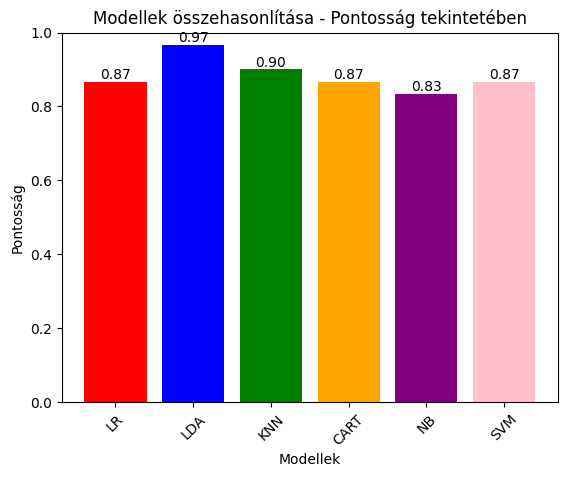

In [11]:
seed = 42 # The answer to life, the universe, and everything
scoring = 'accuracy'

models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN',KNeighborsClassifier() ))
models.append(('CART', DecisionTreeClassifier() ))
models.append(('NB',GaussianNB() ))
models.append(('SVM', SVC() ))

# Minden modellen átfutunk 
results = []
names = []

# Kiértékelés a teszt adatokon
print("\nModell végső kiértékelése a teszt adatokon\n")
for name, model in models:
    model.fit(X_train, Y_train)
    predictions = model.predict(X_validation)  # Előrejelzés a tesztadatokon
    accu = accuracy_score(Y_validation, predictions)
    results.append(accu)
    names.append(name)

    print(f"{name} teljesítménye:")
    print(f"Pontosság: {accu:.4f}")

    print("Konfúziós mátrix:")
    print(confusion_matrix(Y_validation, predictions))

    print("Osztályozási jelentés:")
    print(classification_report(Y_validation, predictions))
    
    print("-" * 60)

# Eredmények vizualizálásas
print("\nEredmények vizualizálása")
bars = plt.bar(names, results, color=['red', 'blue', 'green', 'orange', 'purple', 'pink'])
plt.xticks(rotation=45)
plt.ylim(0, 1)
for bar, result in zip(bars, results):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{result:.2f}', ha='center', va='bottom')
plt.title('Modellek összehasonlítása - Pontosság tekintetében')
plt.ylabel('Pontosság')
plt.xlabel('Modellek')
plt.show()

# Feladatok

1.	Elemezzük a `dbalance.csv` fájl adatait. Az adathalmaz tartalmazza egy mérleg bal és jobb oldalának súlyát és távolságát, valamint a mérleg egyensúlyi állapotát (balra dől, jobbra dől, kiegyensúlyozott).
A mérleg állapotát az alábbi szabály alapján határozzuk meg:

* `bal nyomaték = bal súly * bal távolság`

* `jobb nyomaték = jobb súly * jobb távolság`

Ha: `bal nyomaték > jobb nyomaték`, akkor a mérleg balra dől (`L`).

Ha: `bal nyomaték < jobb nyomaték`, akkor a mérleg jobbra dől (`R`).

Ha: `bal nyomaték = jobb nyomaték`, akkor a mérleg kiegyensúlyozott (`B`).



2.	Hány adatunk van és mi az osztályelosztás? Vizsgáljuk meg alaposan az adatokat, tisztítsuk meg őket, pótoljuk a hiányzó mezőket!


3.	Építsünk egy döntési fa (*decision tree*) és egy naiv Bayes-féle osztályozó modellt az adatokra.

4.	Írassuk ki a konfúziós mátrixot, az átlag pontosságot, F1-mértéket a [beépített metrika függvények](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics) meghívásával.